In [29]:
import pandas as pd
import numpy as np
import re

In [30]:
#NC
#NF means non fixed
pdNCF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesNC_Fixed_nvar_ncon.csv")
pdNCNF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesNC_nvar_ncon.csv")
#AP
pdAPF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesAP_Fixed_nvar_ncon.csv")
pdAPNF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesAP_nvar_ncon.csv")
#drift and delay
pdDDF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedes_Fixed_nvar_ncon.csv")
pdDDNF=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedes_nvar_ncon.csv")

#heuristic
pdDDHeur=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedes_HeurPath_nvar_ncon.csv")
pdAPHeur=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesAP_HeurPath_nvar_ncon.csv")
pdNCHeur=pd.read_csv("/home/magi/UAMdeconflictionMasterThesis/risultati/mercedes/times/mercedesNC_HeurPath_nvar_ncon.csv")

### Remove data obtained multiple times

In [31]:
pdNCF = pdNCF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdNCNF = pdNCNF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdAPF = pdAPF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdAPNF = pdAPNF.drop_duplicates(subset=['instance',"reduceTini"], keep='last')
pdDDF = pdDDF.drop_duplicates(subset=['instance'], keep='last')
pdDDNF = pdDDNF.drop_duplicates(subset=['instance'], keep='last')
pdDDHeur = pdDDHeur.drop_duplicates(subset=['instance'], keep='last')
pdAPHeur = pdAPHeur.drop_duplicates(subset=['instance'], keep='last')
pdNCHeur = pdNCHeur.drop_duplicates(subset=['instance'], keep='last')

## Generate latex with all information

In [32]:
def move_column(df, col_name, new_pos):
    col = df.pop(col_name)  # Rimuove la colonna
    df.insert(new_pos, col_name, col)  # La inserisce nella nuova posizione
    return df

In [33]:
#NC
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesFixedNC.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdNCF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesNC.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdNCNF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#AP
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesFixedAP.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdAPF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesAP.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(move_column(pdAPNF, "reduceTini", 1).rename(columns={'reduceTini': "-Tini"}).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#Drift and delay
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesFixedDD.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDDF.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesDD.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDDNF.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

#Heuristic
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesDD_Heur.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdDDHeur.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesAP_Heur.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdAPHeur.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/TimesNC_Heur.tex", "w") as f:
    f.write("\\begin{document}\n")
    f.write(pdNCHeur.to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|r|r|"))
    f.write("\\end{document}")

TODO, copy what we have done before master thesis

## Heuristic results

In [34]:
def get_formatted_name(data_name,AP=False,NC=False):
    data_name = data_name.replace("Fixed", "")
    match = re.match(r"([a-zA-Z]+)(\d+)([a-zA-Z0-9-]*)", data_name)
    if match:
        part1 = match.group(1)
        part2 = match.group(3)
        part3 = ""
        if AP:
            part3 = "AP"
        elif NC:
            part3 = "NC"        
        return f"{part1}{part2}{part3}"
    else:
        return data_name  # Caso in cui non ci sia un numero nel nome

In [35]:
def obtainStatsSummary(filtered_merged, columnName, fixed=False,Heur=False, considerUnfeasible=True, AP=False, NC=False):
    if AP or NC:
        Tini = filtered_merged["reduceTini"].iloc[0]
    else:
        Tini = 0
    if fixed:
        columnName=columnName+"Fixed"
    #if Heur:
    #    columnName=columnName+"Heur"
    if considerUnfeasible:
        stats = {
            "Typology":     get_formatted_name(filtered_merged["instance"].iloc[0],AP,NC),
            "Mean":         filtered_merged[columnName].mean(),
            "STD":          filtered_merged[columnName].std(),
            "Min":          filtered_merged[columnName].min(),
            "Max":          filtered_merged[columnName].max(),           
            "TotalCount":   filtered_merged[columnName].count()
        }
        return stats
    stats = {
        "Typology":         get_formatted_name(filtered_merged["instance"].iloc[0],AP,NC),
        "Mean":             filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].mean(),
        "STD":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].std(),
        "Min":              filtered_merged[columnName].min(),
        "Max":              filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].max(),
        "CountSolved":      filtered_merged[np.isfinite(filtered_merged[columnName])][columnName].count(),      
        "TotalCount":       filtered_merged[columnName].count()
    }
    return stats

In [36]:
#drift and delay merged
#airport
df_air01=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr0nDe1")]
df_air02=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr0nDe2")]
df_air03=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr0nDe3")]
#df_air10=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr1nDe0")]
#df_air11=pdDDHeur[pdDDHeur["instance"].str.contains(r"airport\d+nDr1nDe1")]
#grid
df_grid01=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr0nDe1")]
df_grid02=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr0nDe2")]
df_grid03=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr0nDe3")]
#df_grid10=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr1nDe0")]
#df_grid11=pdDDHeur[pdDDHeur["instance"].str.contains(r"grid\d+nDr1nDe1")]
#metroplex
df_mp01=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
df_mp02=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
df_mp03=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr0nDe3")]
#df_mp10=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr1nDe0")]
#df_mp11=pdDDHeur[pdDDHeur["instance"].str.contains(r"metroplex\d+nDr1nDe1")]

In [37]:
#only contains reduceTini = 0
df_airAP=pdAPHeur[pdAPHeur["instance"].str.contains(r"airport")]
df_gridAP=pdAPHeur[pdAPHeur["instance"].str.contains(r"grid")]
df_mpAP=pdAPHeur[pdAPHeur["instance"].str.contains(r"metroplex")]

df_airNC=pdNCHeur[pdNCHeur["instance"].str.contains(r"airport")]
df_gridNC=pdNCHeur[pdNCHeur["instance"].str.contains(r"grid")]
df_mpNC=pdNCHeur[pdNCHeur["instance"].str.contains(r"metroplex")]


In [38]:
dfsHeur = [df_air01, df_air02, df_air03,
           df_grid01, df_grid02, df_grid03,
           df_mp01, df_mp02, df_mp03]
dfsHeurAP = [df_airAP, df_gridAP, df_mpAP]
dfsHeurNC = [df_airNC, df_gridNC, df_mpNC]

In [39]:
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/SummaryTablesHeur.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella:  risultati path fissati
    
    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "result",Heur=True)
        results.append(stats)
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "result",Heur=True,AP=True)
        results.append(stats)
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "result",Heur=True,NC=True)
        results.append(stats)
    # cambiare da result a obj function value e farlo bold
    #                                                                                                                               comparison between the \\textbf{objective function value} with fixed and non fixed path on Mercedes instances, unfeasible instance are considered only in TotalCount")
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:mercedes:resultsHeur",caption="Statistics about \\textbf{objective function value} obtained from Mercedes instances with all path fixed by the heuristic, unfeasible instances are considered only in TotalCount")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: elapsed time path fissati

    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:elapsedTimeHeur",caption="Statistic about \\textbf{elapsed time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: totalSolveTime path fissati
    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalSolveTimeFixed",caption="Statistic about \\textbf{total solve time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: total time path fissati
    results = []
    for i, df in enumerate(dfsHeur):
        stats = obtainStatsSummary(df, "totalTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurAP):
        stats = obtainStatsSummary(df, "totalTime",Heur=True, AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsHeurNC):
        stats = obtainStatsSummary(df, "totalTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalTimeFixed",caption="Statistic about \\textbf{total time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    f.write("\\end{document}")

## Pelegrin instances

### non fixed

In [40]:
#drift and delay non fixed
#airport
dfDDNF_air01=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr0nDe1")]
dfDDNF_air02=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr0nDe2")]
dfDDNF_air03=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr0nDe3")]
dfDDNF_air10=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr1nDe0")]
dfDDNF_air11=pdDDNF[pdDDNF["instance"].str.contains(r"airport\d+nDr1nDe1")]
#grid
dfDDNF_grid01=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr0nDe1")]
dfDDNF_grid02=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr0nDe2")]
dfDDNF_grid03=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr0nDe3")]
dfDDNF_grid10=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr1nDe0")]
dfDDNF_grid11=pdDDNF[pdDDNF["instance"].str.contains(r"grid\d+nDr1nDe1")]
#metroplex
dfDDNF_mp01=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
dfDDNF_mp02=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
dfDDNF_mp03=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr0nDe3")]
dfDDNF_mp10=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr1nDe0")]
dfDDNF_mp11=pdDDNF[pdDDNF["instance"].str.contains(r"metroplex\d+nDr1nDe1")]

In [41]:
#high priority non fixed
dfAPNF_air=pdAPNF[pdAPNF["instance"].str.contains(r"airport")]
dfAPNF_grid=pdAPNF[pdAPNF["instance"].str.contains(r"grid")]
dfAPNF_mp=pdAPNF[pdAPNF["instance"].str.contains(r"metroplex")]

#non collaborative intruder non fixed
dfNCNF_air=pdNCNF[pdNCNF["instance"].str.contains(r"airport")]
dfNCNF_grid=pdNCNF[pdNCNF["instance"].str.contains(r"grid")]
dfNCNF_mp=pdNCNF[pdNCNF["instance"].str.contains(r"metroplex")]

In [42]:
dfsDDNF = [dfDDNF_air01, dfDDNF_air02, dfDDNF_air03, dfDDNF_air10, dfDDNF_air11,
           dfDDNF_grid01, dfDDNF_grid02, dfDDNF_grid03, dfDDNF_grid10, dfDDNF_grid11,
           dfDDNF_mp01, dfDDNF_mp02, dfDDNF_mp03, dfDDNF_mp10, dfDDNF_mp11]
dfsAPNF = [dfAPNF_air, dfAPNF_grid, dfAPNF_mp]
dfsNCNF = [dfNCNF_air, dfNCNF_grid, dfNCNF_mp]

In [43]:
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/SummaryTablesNonFixed.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella:  risultati path fissati
    
    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "result",Heur=True)
        results.append(stats)
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "result",Heur=True,AP=True)
        results.append(stats)
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "result",Heur=True,NC=True)
        results.append(stats)
    # cambiare da result a obj function value e farlo bold
    #                                                                                                                               comparison between the \\textbf{objective function value} with fixed and non fixed path on Mercedes instances, unfeasible instance are considered only in TotalCount")
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:mercedes:resultsHeur",caption="Statistics about \\textbf{objective function value} obtained from Mercedes instances with all path fixed by the heuristic, unfeasible instances are considered only in TotalCount")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: elapsed time path fissati

    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:elapsedTimeHeur",caption="Statistic about \\textbf{elapsed time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: totalSolveTime path fissati
    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalSolveTimeFixed",caption="Statistic about \\textbf{total solve time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: total time path fissati
    results = []
    for i, df in enumerate(dfsDDNF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPNF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True, AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCNF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalTimeFixed",caption="Statistic about \\textbf{total time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    f.write("\\end{document}")

### fixed

In [44]:
#drift and delay fixed
#airport
dfDDF_air01=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr0nDe1")]
dfDDF_air02=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr0nDe2")]
dfDDF_air03=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr0nDe3")]
dfDDF_air10=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr1nDe0")]
dfDDF_air11=pdDDF[pdDDF["instance"].str.contains(r"airport\d+nDr1nDe1")]
#grid
dfDDF_grid01=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr0nDe1")]
dfDDF_grid02=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr0nDe2")]
dfDDF_grid03=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr0nDe3")]
dfDDF_grid10=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr1nDe0")]
dfDDF_grid11=pdDDF[pdDDF["instance"].str.contains(r"grid\d+nDr1nDe1")]
#metroplex
dfDDF_mp01=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr0nDe1")]
dfDDF_mp02=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr0nDe2")]
dfDDF_mp03=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr0nDe3")]
dfDDF_mp10=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr1nDe0")]
dfDDF_mp11=pdDDF[pdDDF["instance"].str.contains(r"metroplex\d+nDr1nDe1")]

In [45]:
#high priority fixed
dfAPF_air=pdAPF[pdAPF["instance"].str.contains(r"airport")]
dfAPF_grid=pdAPF[pdAPF["instance"].str.contains(r"grid")]
dfAPF_mp=pdAPF[pdAPF["instance"].str.contains(r"metroplex")]

#non collaborative intruder fixed
dfNCF_air=pdNCF[pdNCF["instance"].str.contains(r"airport")]
dfNCF_grid=pdNCF[pdNCF["instance"].str.contains(r"grid")]
dfNCF_mp=pdNCF[pdNCF["instance"].str.contains(r"metroplex")]

In [46]:
dfsDDF = [dfDDF_air01, dfDDF_air02, dfDDF_air03, dfDDF_air10, dfDDF_air11,
           dfDDF_grid01, dfDDF_grid02, dfDDF_grid03, dfDDF_grid10, dfDDF_grid11,
           dfDDF_mp01, dfDDF_mp02, dfDDF_mp03, dfDDF_mp10, dfDDF_mp11]
dfsAPF = [dfAPF_air, dfAPF_grid, dfAPF_mp]
dfsNCF = [dfNCF_air, dfNCF_grid, dfNCF_mp]

In [47]:
with open("/home/magi/UAMdeconflictionMasterThesis/risultati/afterThesis/mercedes/times/SummaryTablesFixed.tex", "w") as f:
    f.write("\\begin{document}\n")

    #prima tabella:  risultati path fissati
    
    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "result",Heur=True)
        results.append(stats)
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "result",Heur=True,AP=True)
        results.append(stats)
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "result",Heur=True,NC=True)
        results.append(stats)
    # cambiare da result a obj function value e farlo bold
    #                                                                                                                               comparison between the \\textbf{objective function value} with fixed and non fixed path on Mercedes instances, unfeasible instance are considered only in TotalCount")
    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|r|",label="table:mercedes:resultsHeur",caption="Statistics about \\textbf{objective function value} obtained from Mercedes instances with all path fixed by the heuristic, unfeasible instances are considered only in TotalCount")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #seconda tabella: elapsed time path fissati

    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "elapsedTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:elapsedTimeHeur",caption="Statistic about \\textbf{elapsed time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #terza tabella: totalSolveTime path fissati
    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "totalSolveTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalSolveTimeFixed",caption="Statistic about \\textbf{total solve time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    #quarta tabella: total time path fissati
    results = []
    for i, df in enumerate(dfsDDF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True)
        results.append(stats)    
    for i, df in enumerate(dfsAPF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True, AP=True)
        results.append(stats)    
    for i, df in enumerate(dfsNCF):
        stats = obtainStatsSummary(df, "totalTime",Heur=True,NC=True)
        results.append(stats)

    latex_table = pd.DataFrame(results).to_latex(index=False, longtable=True, column_format="|l|r|r|r|r|r|",label="table:mercedes:totalTimeFixed",caption="Statistic about \\textbf{total time} needed for Mercedes instances with all path fixed by the heuristic")
    latex_table = latex_table.replace(r'\toprule', "").replace(r'\midrule', "").replace(r'\bottomrule', "").replace(r'\\',r'\\ \hline')
    f.write(latex_table)

    f.write("\\end{document}")

# Results

--- Drift and Delay (DD) Analysis ---
Comparison of Solved Instances:
             Typology   Approach  Avg_Result  Avg_TotalTime  Avg_ElapsedTime  Solved_Count
0     airportnDr0nDe1      Fixed    1.483053       0.846031         0.490566            98
1     airportnDr0nDe1  Non-Fixed    1.474326       0.946968         0.498413            99
2     airportnDr0nDe2      Fixed    2.018271       0.887703         0.503007            98
3     airportnDr0nDe2  Non-Fixed    2.002695       1.003531         0.506638            99
4     airportnDr0nDe3      Fixed    2.008030       0.911773         0.479590            98
5     airportnDr0nDe3  Non-Fixed    2.007569       1.120062         0.518888            99
6        gridnDr0nDe1      Fixed    4.837168       2.804313         2.215121           100
7        gridnDr0nDe1  Non-Fixed    4.828095       3.638539         2.210147           100
8        gridnDr0nDe2      Fixed    6.626140       2.987877         2.307241           100
9        gridnDr0nDe

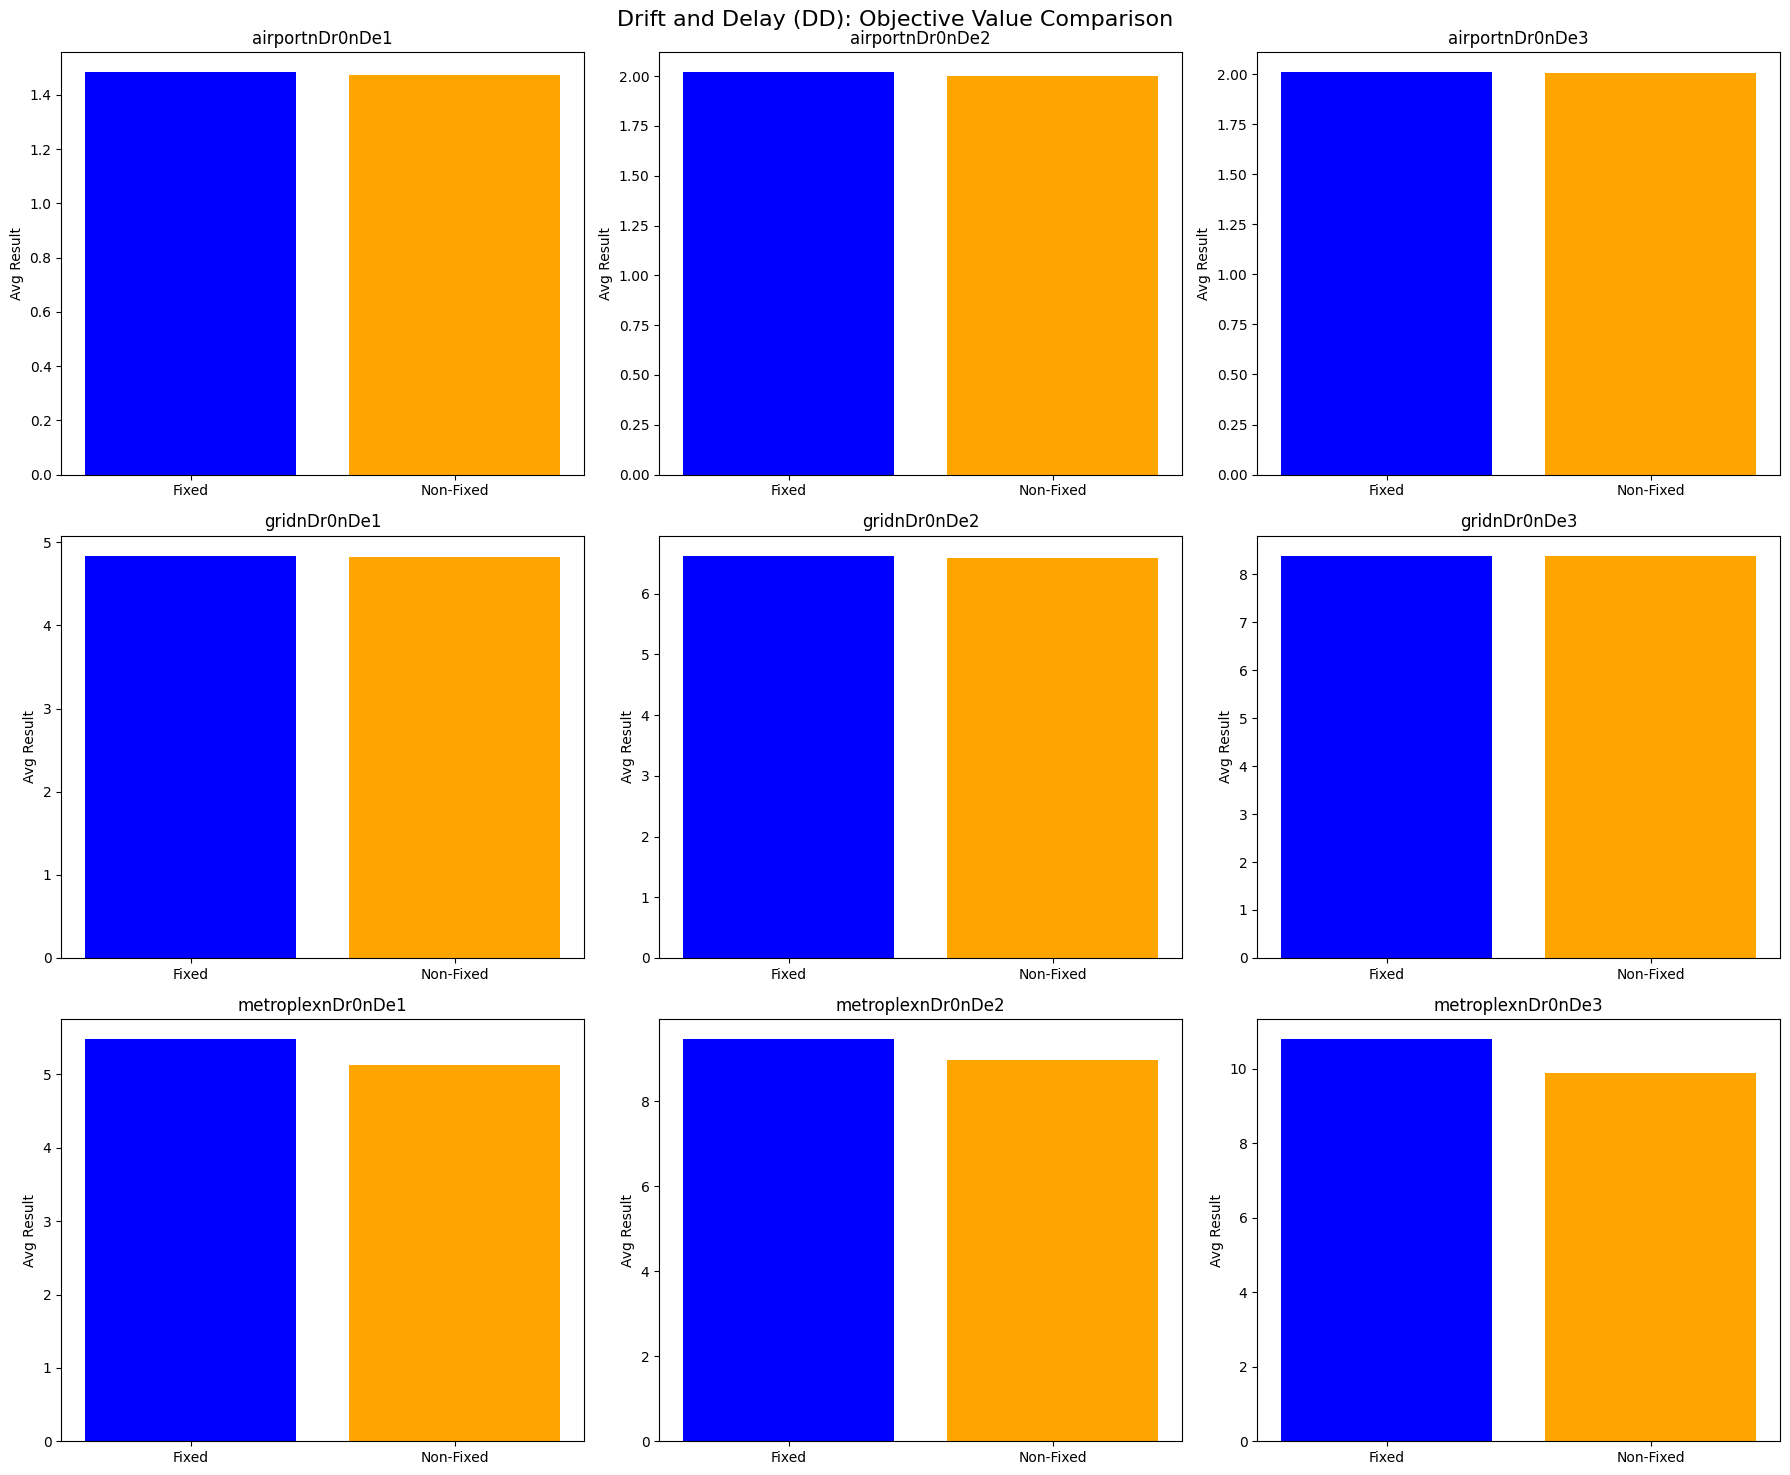

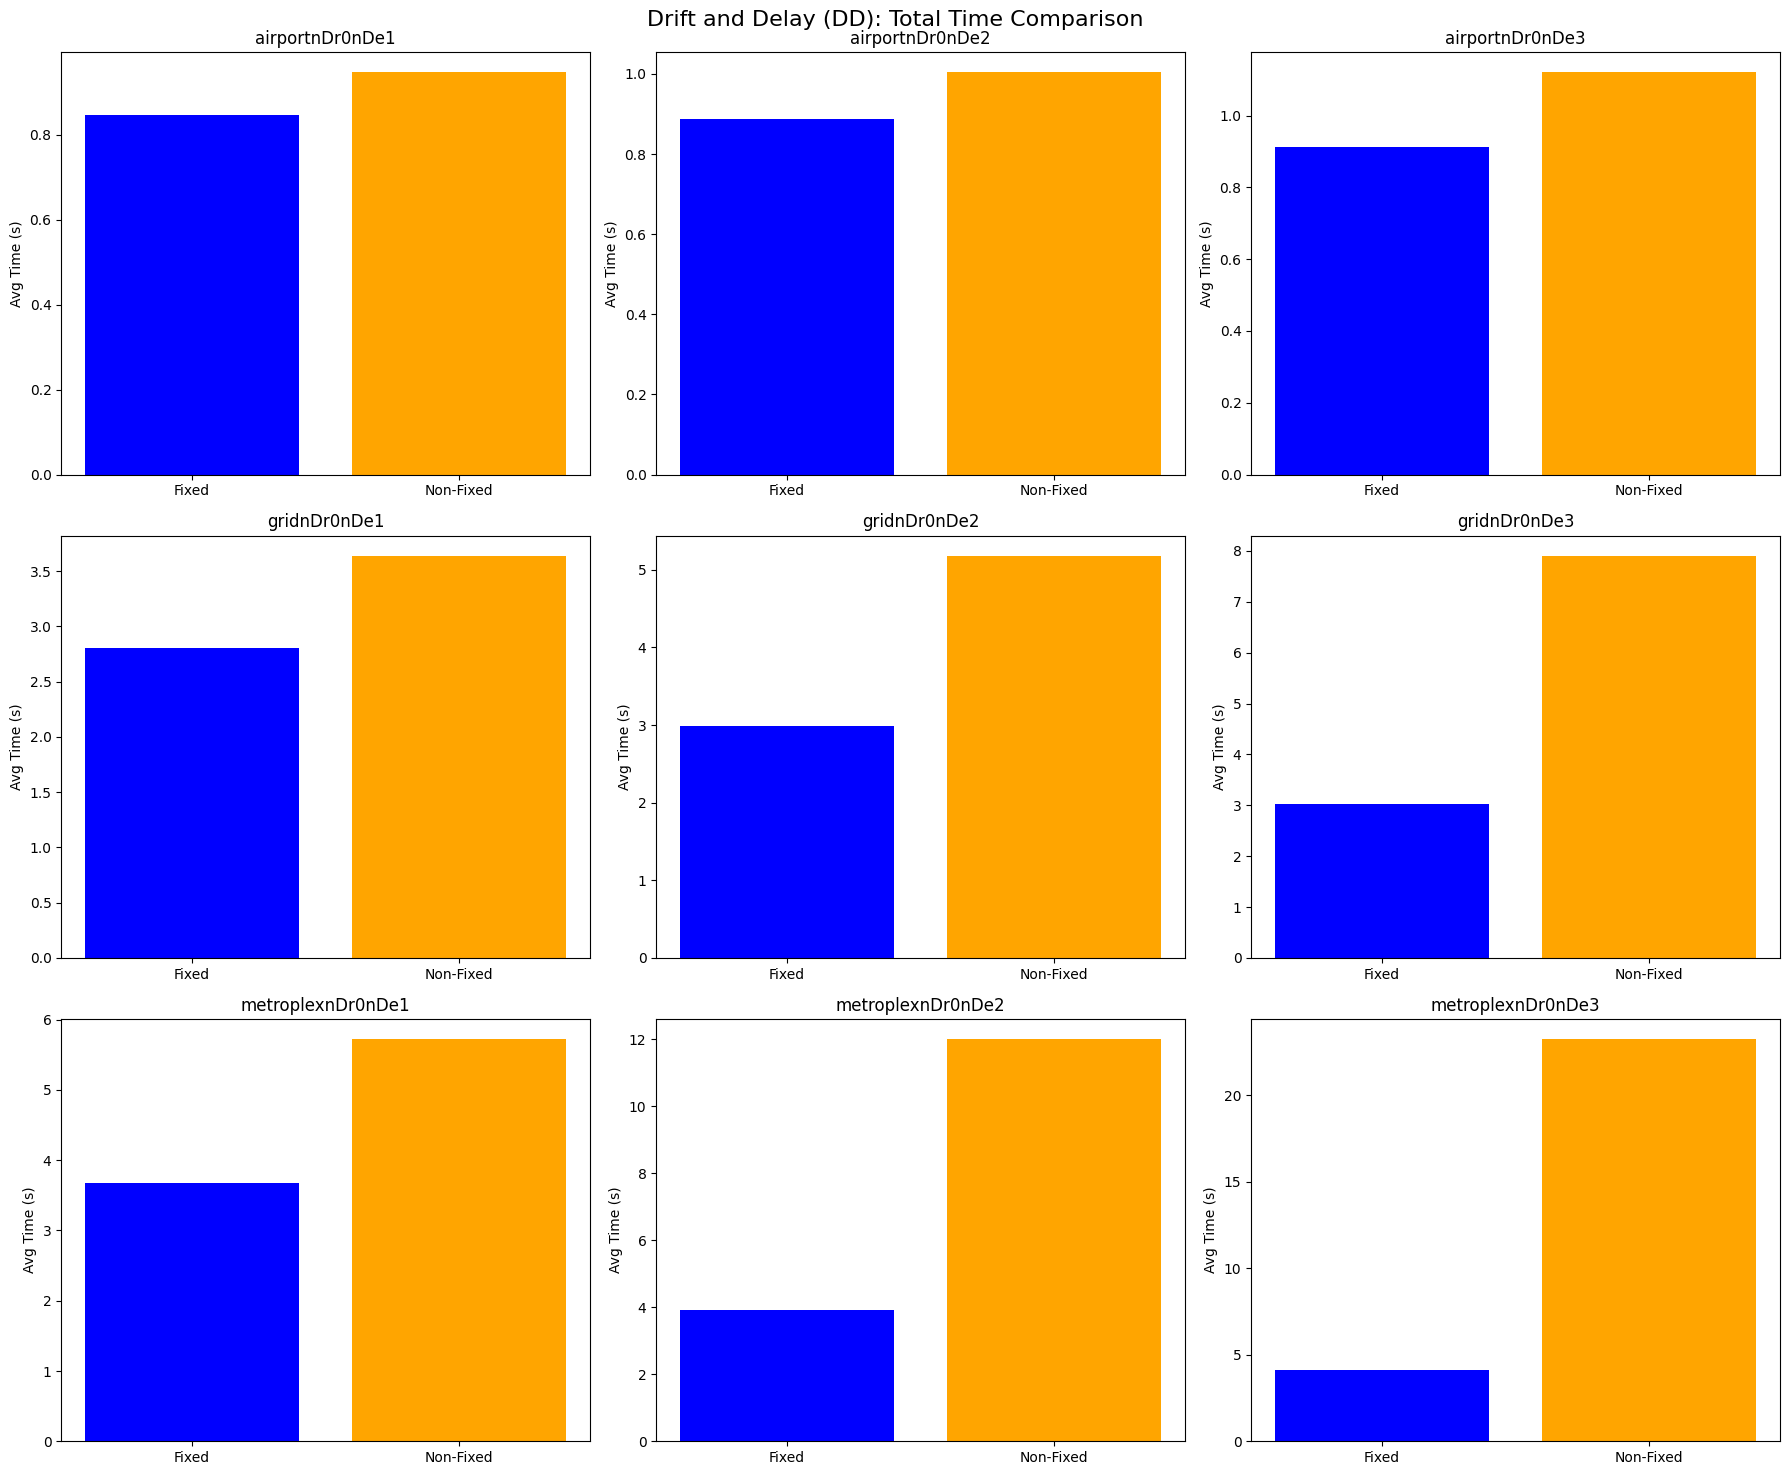

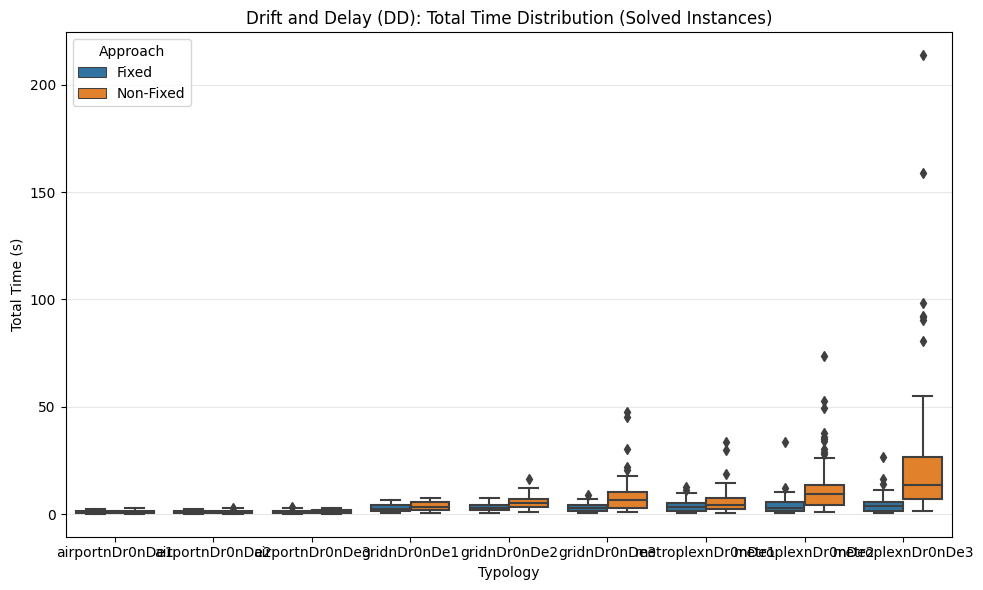


Detailed Differences (> 2e-6): 68 instances
          instance      Typology  result_Fixed  result_NonFixed  Improvement
24  grid28nDr0nDe1  gridnDr0nDe1      6.100251         6.000000     0.100251
29  grid34nDr0nDe1  gridnDr0nDe1     12.190476        12.090226     0.100250
33  grid40nDr0nDe1  gridnDr0nDe1     10.310777        10.210526     0.100251
65  grid72nDr0nDe1  gridnDr0nDe1      7.443609         6.837093     0.606516
59  grid57nDr0nDe2  gridnDr0nDe2      9.944862         9.844612     0.100250
61  grid68nDr0nDe2  gridnDr0nDe2      9.624060         9.523810     0.100250
64  grid65nDr0nDe2  gridnDr0nDe2     10.601504        10.501253     0.100251
69  grid75nDr0nDe2  gridnDr0nDe2      9.350877         6.809524     2.541353
30  grid34nDr0nDe3  gridnDr0nDe3     10.842105        10.741855     0.100250
58  grid63nDr0nDe3  gridnDr0nDe3     20.456140        19.807018     0.649122


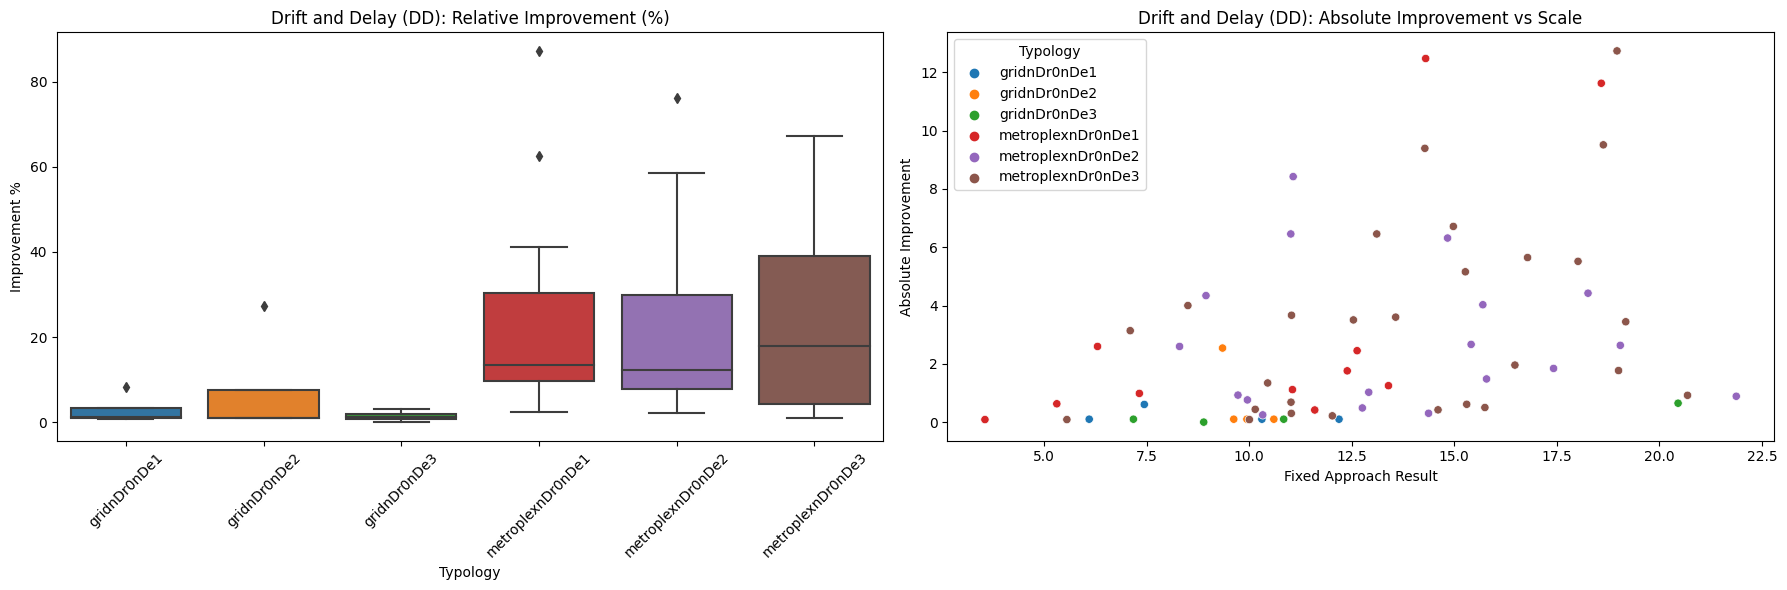

,Typology,Approach,Avg_Result,Avg_TotalTime,Avg_ElapsedTime,Solved_Count
0,airportnDr0nDe1,Fixed,1.483053,0.846031,0.490566,98
1,airportnDr0nDe1,Non-Fixed,1.474326,0.946968,0.498413,99
2,airportnDr0nDe2,Fixed,2.018271,0.887703,0.503007,98
3,airportnDr0nDe2,Non-Fixed,2.002695,1.003531,0.506638,99
4,airportnDr0nDe3,Fixed,2.008030,0.911773,0.479590,98
5,airportnDr0nDe3,Non-Fixed,2.007569,1.120062,0.518888,99
6,gridnDr0nDe1,Fixed,4.837168,2.804313,2.215121,100
7,gridnDr0nDe1,Non-Fixed,4.828095,3.638539,2.210147,100
8,gridnDr0nDe2,Fixed,6.626140,2.987877,2.307241,100
9,gridnDr0nDe2,Non-Fixed,6.597719,5.181095,2.324935,100


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def process_approach(df, typology, approach_name, unsolved_summary_list):
    if df.empty:
        return None
        
    # Identify solved (finite result) and unsolved (infinite result)
    solved = df[np.isfinite(df['result'])]
    unsolved = df[~np.isfinite(df['result'])]
    
    # Record unsolved instances if any
    if not unsolved.empty:
        unsolved_summary_list.append({
            'Typology': typology,
            'Approach': approach_name,
            'Unsolved_Count': len(unsolved),
            'Unsolved_Instances': unsolved['instance'].tolist()
        })
    
    # Return stats only for solved instances
    if not solved.empty:
        return {
            'Typology': typology,
            'Approach': approach_name,
            'Avg_Result': solved['result'].mean(),
            'Avg_TotalTime': solved['totalTime'].mean(),
            'Avg_ElapsedTime': solved['elapsedTime'].mean(),
            'Solved_Count': len(solved)
        }
    return None

def run_comparison_analysis(dfs_fixed_list, dfs_nonfixed_list, typologies, analysis_name, AP=False, NC=False, filter_tini=True):
    print(f"--- {analysis_name} Analysis ---")
    
    comparison_data = []
    unsolved_summary = []
    detailed_diffs = []
    improved_feasibility = []
    all_time_data = []

    for typ in typologies:
        # Determine pattern for filtering
        if AP or NC:
             # For AP/NC typologies are just 'airport', 'grid', 'metroplex'
             pattern = typ
        else:
             # For DD, typologies are like 'airportnDr0nDe1', need to handle the number part
             pattern = typ.replace('nDr', r'\d+nDr')

        # Helper to filter and concat
        def _get_data(dfs_list, p):
            filtered = []
            for df in dfs_list:
                mask = df['instance'].str.contains(p)
                if filter_tini and 'reduceTini' in df.columns:
                    mask &= df['reduceTini'] == 0
                filtered.append(df[mask])
            return pd.concat(filtered, ignore_index=False) if filtered else pd.DataFrame()

        fixed_df = _get_data(dfs_fixed_list, pattern)
        nonfixed_df = _get_data(dfs_nonfixed_list, pattern)

        # Collect raw time data for boxplot
        if not fixed_df.empty:
            solved_fixed = fixed_df[np.isfinite(fixed_df['result'])]
            if not solved_fixed.empty:
                temp_df = solved_fixed[['totalTime']].copy()
                temp_df['Typology'] = typ
                temp_df['Approach'] = 'Fixed'
                all_time_data.append(temp_df)

        if not nonfixed_df.empty:
            solved_nonfixed = nonfixed_df[np.isfinite(nonfixed_df['result'])]
            if not solved_nonfixed.empty:
                temp_df = solved_nonfixed[['totalTime']].copy()
                temp_df['Typology'] = typ
                temp_df['Approach'] = 'Non-Fixed'
                all_time_data.append(temp_df)

        # Process summaries
        res_fixed = process_approach(fixed_df, typ, 'Fixed', unsolved_summary)
        if res_fixed: comparison_data.append(res_fixed)
        
        res_nonfixed = process_approach(nonfixed_df, typ, 'Non-Fixed', unsolved_summary)
        if res_nonfixed: comparison_data.append(res_nonfixed)

        # Merge for comparison
        # Columns to merge on
        merge_cols = ['instance']
        if 'reduceTini' in fixed_df.columns and 'reduceTini' in nonfixed_df.columns:
            merge_cols.append('reduceTini')
            
        if not fixed_df.empty and not nonfixed_df.empty:
            merged = pd.merge(fixed_df, nonfixed_df, on=merge_cols, suffixes=('_Fixed', '_NonFixed'))
            
            # Check for feasibility improvement (Fixed Unsolved -> NonFixed Solved)
            newly_solved = merged[~np.isfinite(merged['result_Fixed']) & np.isfinite(merged['result_NonFixed'])]
            for _, row in newly_solved.iterrows():
                improved_feasibility.append({
                    'Typology': typ,
                    'Instance': row['instance'],
                    'Fixed_Result': row['result_Fixed'],
                    'NonFixed_Result': row['result_NonFixed']
                })

            # Check for differences in solved instances
            merged_solved = merged[np.isfinite(merged['result_Fixed']) & np.isfinite(merged['result_NonFixed'])]
            diff_mask = np.abs(merged_solved['result_Fixed'] - merged_solved['result_NonFixed']) > 2e-6
            diffs = merged_solved[diff_mask].copy()
            
            if not diffs.empty:
                diffs['Typology'] = typ
                diffs['Improvement'] = diffs['result_Fixed'] - diffs['result_NonFixed']
                diffs['Rel_Improvement'] = (diffs['Improvement'] / diffs['result_Fixed']) * 100
                detailed_diffs.append(diffs)

    # Output Results
    comparison_df = pd.DataFrame(comparison_data)
    if not comparison_df.empty:
        print("Comparison of Solved Instances:")
        print(comparison_df.to_string())
    else:
        print("No solved instances found.")

    if unsolved_summary:
        print("\nSummary of Unsolved Instances:")
        print(pd.DataFrame(unsolved_summary)[['Typology', 'Approach', 'Unsolved_Count']].to_string())

    if improved_feasibility:
        print(f"\nTotal instances solved by Non-Fixed but NOT by Fixed: {len(improved_feasibility)}")

    # Visualization
    if not comparison_df.empty:
        # Determine grid size for plots
        n_plots = len(typologies)
        n_cols = 3
        n_rows = (n_plots + n_cols - 1) // n_cols
        
        # Plot Objective Value
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
        fig.suptitle(f'{analysis_name}: Objective Value Comparison', fontsize=16)
        axes = axes.flatten() if n_plots > 1 else [axes]
        
        for idx, typ in enumerate(typologies):
            data = comparison_df[comparison_df['Typology'] == typ]
            if not data.empty:
                axes[idx].bar(data['Approach'], data['Avg_Result'], color=['blue', 'orange'])
                axes[idx].set_title(f'{typ}')
                axes[idx].set_ylabel('Avg Result')
            else:
                axes[idx].set_visible(False)
        
        # Hide unused axes
        for i in range(idx+1, len(axes)):
            axes[i].set_visible(False)
        plt.tight_layout()
        plt.show()

        # Plot Total Time
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
        fig.suptitle(f'{analysis_name}: Total Time Comparison', fontsize=16)
        axes = axes.flatten() if n_plots > 1 else [axes]
        
        for idx, typ in enumerate(typologies):
            data = comparison_df[comparison_df['Typology'] == typ]
            if not data.empty:
                axes[idx].bar(data['Approach'], data['Avg_TotalTime'], color=['blue', 'orange'])
                axes[idx].set_title(f'{typ}')
                axes[idx].set_ylabel('Avg Time (s)')
            else:
                axes[idx].set_visible(False)
        
        # Hide unused axes
        for i in range(idx+1, len(axes)):
            axes[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    # Plot Time Boxplot
    if all_time_data:
        time_df = pd.concat(all_time_data, ignore_index=True)
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=time_df, x='Typology', y='totalTime', hue='Approach')
        plt.title(f'{analysis_name}: Total Time Distribution (Solved Instances)')
        plt.ylabel('Total Time (s)')
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Detailed Differences
    if detailed_diffs:
        all_diffs = pd.concat(detailed_diffs)
        print(f"\nDetailed Differences (> 2e-6): {len(all_diffs)} instances")
        print(all_diffs[['instance', 'Typology', 'result_Fixed', 'result_NonFixed', 'Improvement']].head(10).to_string())
        
        fig, ax = plt.subplots(1, 2, figsize=(18, 6))
        sns.boxplot(x='Typology', y='Rel_Improvement', data=all_diffs, ax=ax[0])
        ax[0].set_title(f'{analysis_name}: Relative Improvement (%)')
        ax[0].set_ylabel('Improvement %')
        ax[0].tick_params(axis='x', rotation=45)
        
        sns.scatterplot(x='result_Fixed', y='Improvement', hue='Typology', data=all_diffs, ax=ax[1])
        ax[1].set_title(f'{analysis_name}: Absolute Improvement vs Scale')
        ax[1].set_xlabel('Fixed Approach Result')
        ax[1].set_ylabel('Absolute Improvement')
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo significant differences found between Fixed and Non-Fixed.")
    
    return comparison_df

# Run for Drift and Delay
typologies_DD = ['airportnDr0nDe1', 'airportnDr0nDe2', 'airportnDr0nDe3',
              'gridnDr0nDe1', 'gridnDr0nDe2', 'gridnDr0nDe3',
              'metroplexnDr0nDe1', 'metroplexnDr0nDe2', 'metroplexnDr0nDe3']

run_comparison_analysis(dfsDDF, dfsDDNF, typologies_DD, "Drift and Delay (DD)", filter_tini=True)

--- High Priority (AP) Analysis ---
Comparison of Solved Instances:
    Typology   Approach   Avg_Result  Avg_TotalTime  Avg_ElapsedTime  Solved_Count
0    airport      Fixed   715.811186       1.585380         0.787954           294
1    airport  Non-Fixed   708.603073       1.646817         0.796748           297
2       grid      Fixed  1262.968346       4.990573         3.564065           300
3       grid  Non-Fixed  1213.598513       6.292811         3.598227           300
4  metroplex      Fixed  1092.146671       6.528672         4.174364           300
5  metroplex  Non-Fixed   862.424839      16.723261         4.262182           300


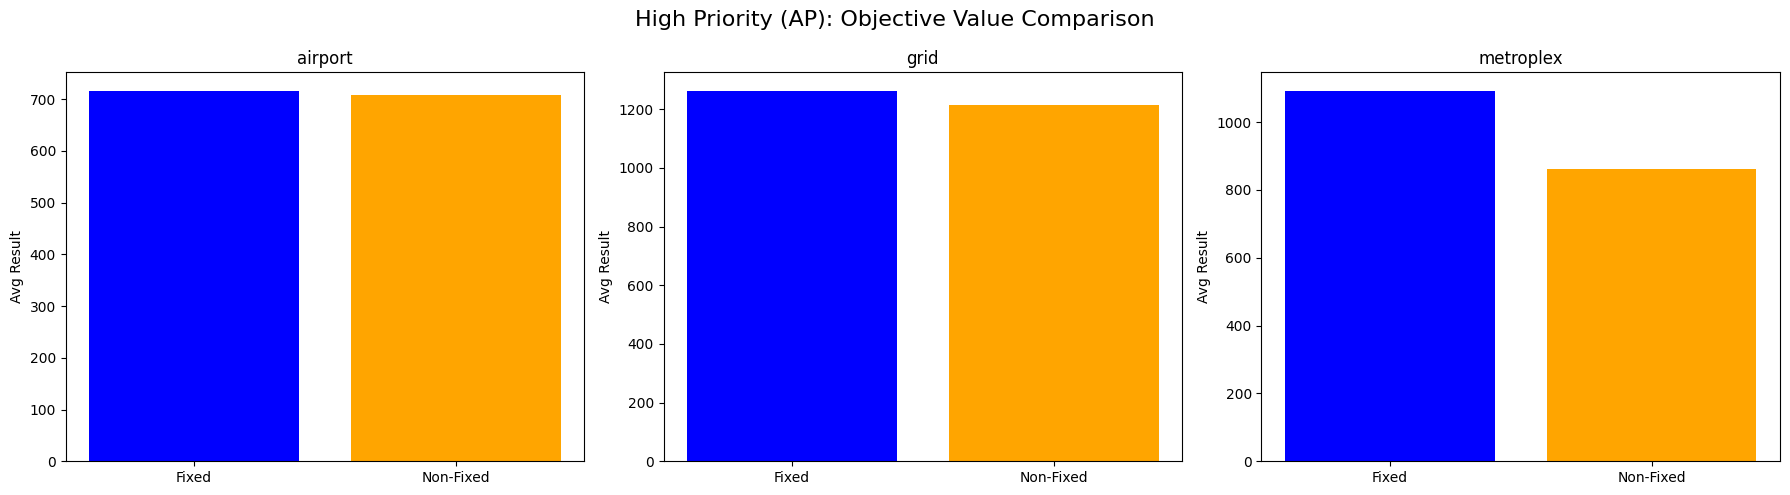

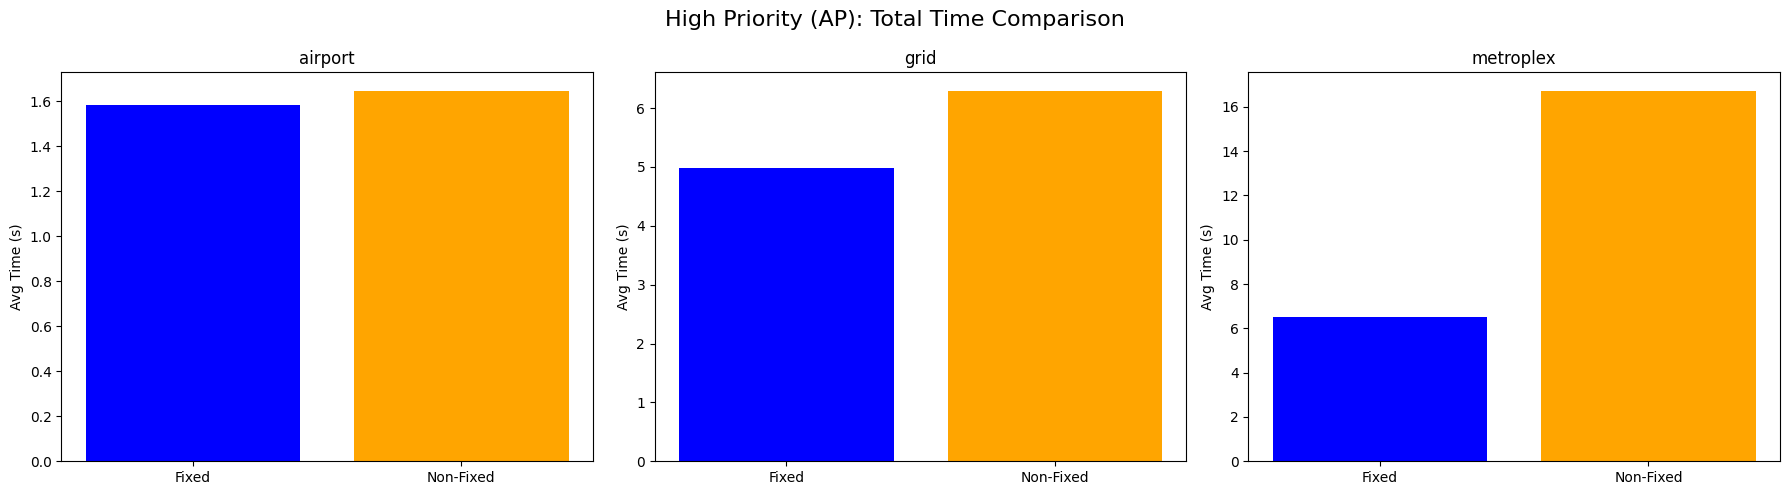

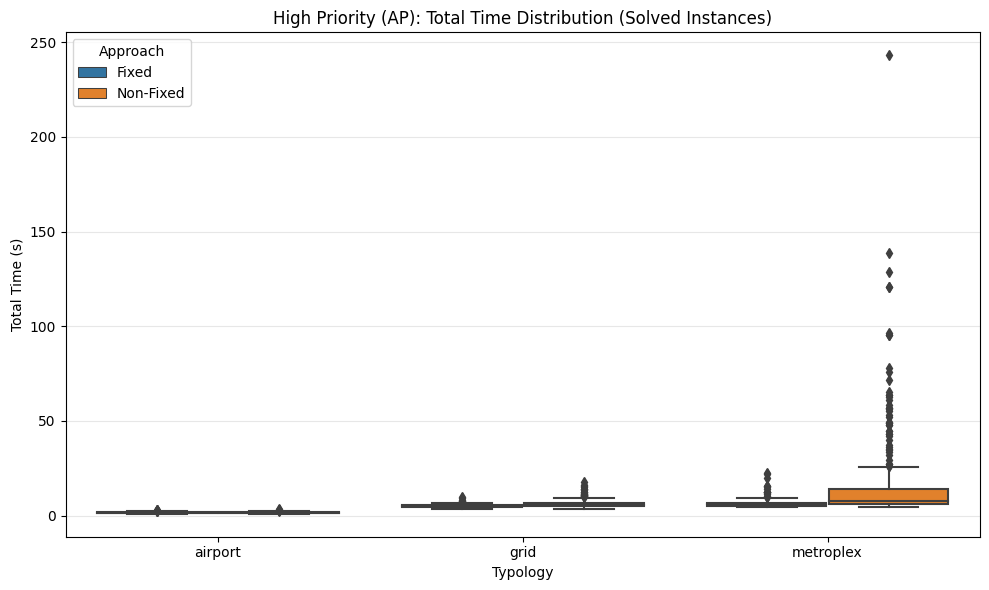


Detailed Differences (> 2e-6): 79 instances
    instance Typology  result_Fixed  result_NonFixed  Improvement
10     grid1     grid   1000.947368        19.273183   981.674185
39    grid36     grid   2002.000000      1020.152882   981.847118
43     grid1     grid   1001.052632        19.283208   981.769424
51    grid26     grid   1007.839599        17.265664   990.573935
73     grid1     grid   1000.947368        19.132832   981.814536
78    grid26     grid   1007.523810        16.949875   990.573935
91     grid3     grid   3003.253133      1017.997494  1985.255639
106   grid40     grid      1.368421         1.260652     0.107769
119    grid5     grid   1001.000000        20.721805   980.278195
121    grid3     grid   3004.411028      1019.155388  1985.255640


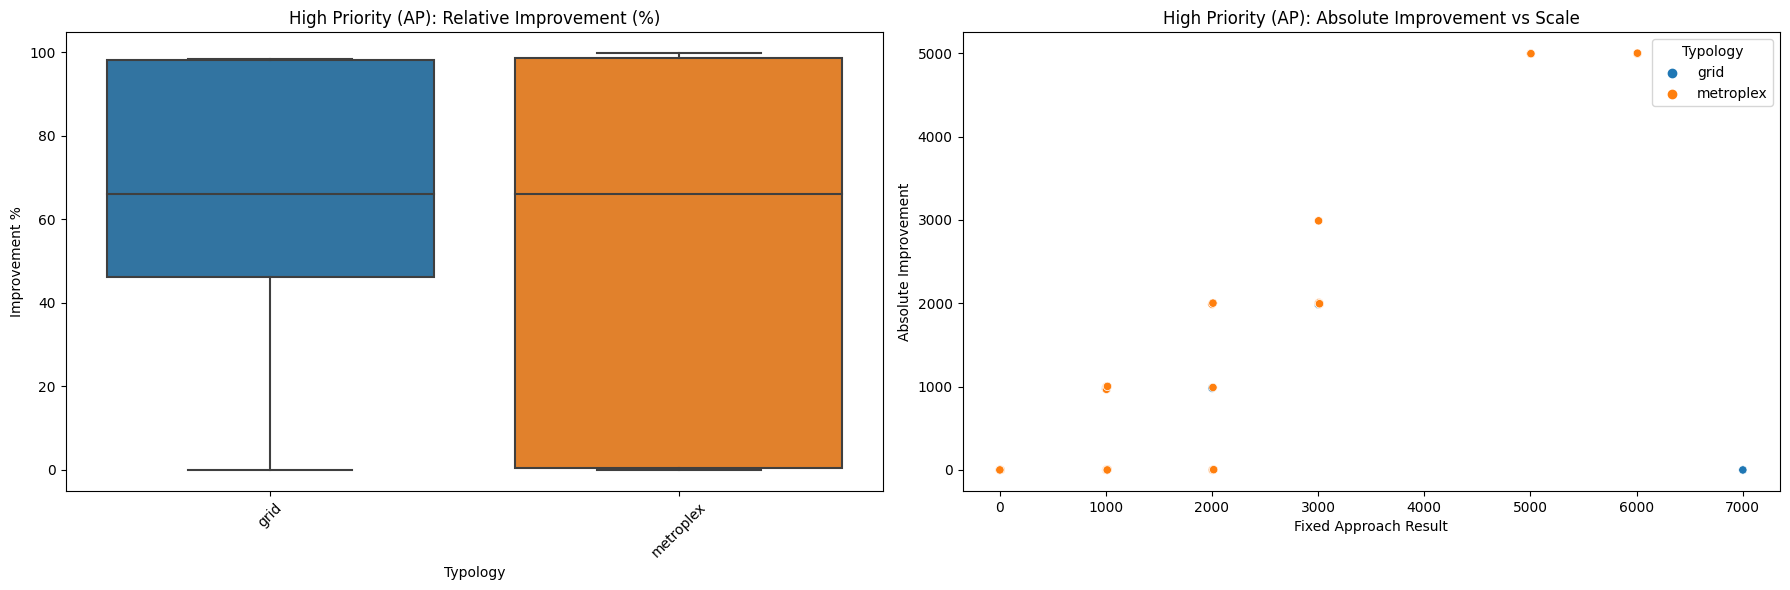

,Typology,Approach,Avg_Result,Avg_TotalTime,Avg_ElapsedTime,Solved_Count
0,airport,Fixed,715.811186,1.585380,0.787954,294
1,airport,Non-Fixed,708.603073,1.646817,0.796748,297
2,grid,Fixed,1262.968346,4.990573,3.564065,300
3,grid,Non-Fixed,1213.598513,6.292811,3.598227,300
4,metroplex,Fixed,1092.146671,6.528672,4.174364,300
5,metroplex,Non-Fixed,862.424839,16.723261,4.262182,300


In [52]:
# Run for High Priority (AP)
typologies_AP = ['airport', 'grid', 'metroplex']
run_comparison_analysis(dfsAPF, dfsAPNF, typologies_AP, "High Priority (AP)", AP=True, filter_tini=False)

--- Non-Collaborative (NC) Analysis ---
Comparison of Solved Instances:
    Typology   Approach  Avg_Result  Avg_TotalTime  Avg_ElapsedTime  Solved_Count
0    airport      Fixed    1.611276       1.269537         0.941567            87
1    airport  Non-Fixed    2.223369       1.436830         0.991373            97
2       grid      Fixed    3.732139       4.717365         3.674959            43
3       grid  Non-Fixed    8.004985       9.912260         4.000289            57
4  metroplex      Fixed    6.268103       5.772944         4.577362            97
5  metroplex  Non-Fixed    7.724700      14.761727         5.664320           123

Summary of Unsolved Instances:
    Typology   Approach  Unsolved_Count
0    airport      Fixed             189
1    airport  Non-Fixed             182
2       grid      Fixed             251
3       grid  Non-Fixed             237
4  metroplex      Fixed             155
5  metroplex  Non-Fixed             129

Total instances solved by Non-Fixed but N

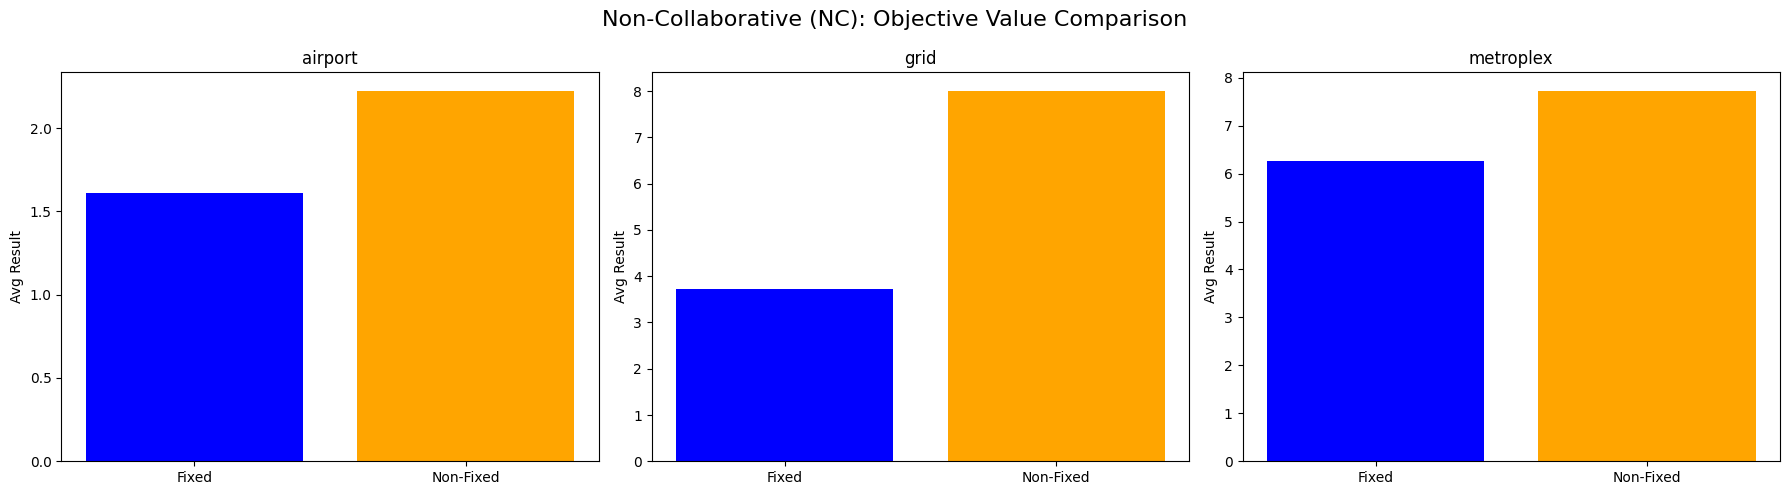

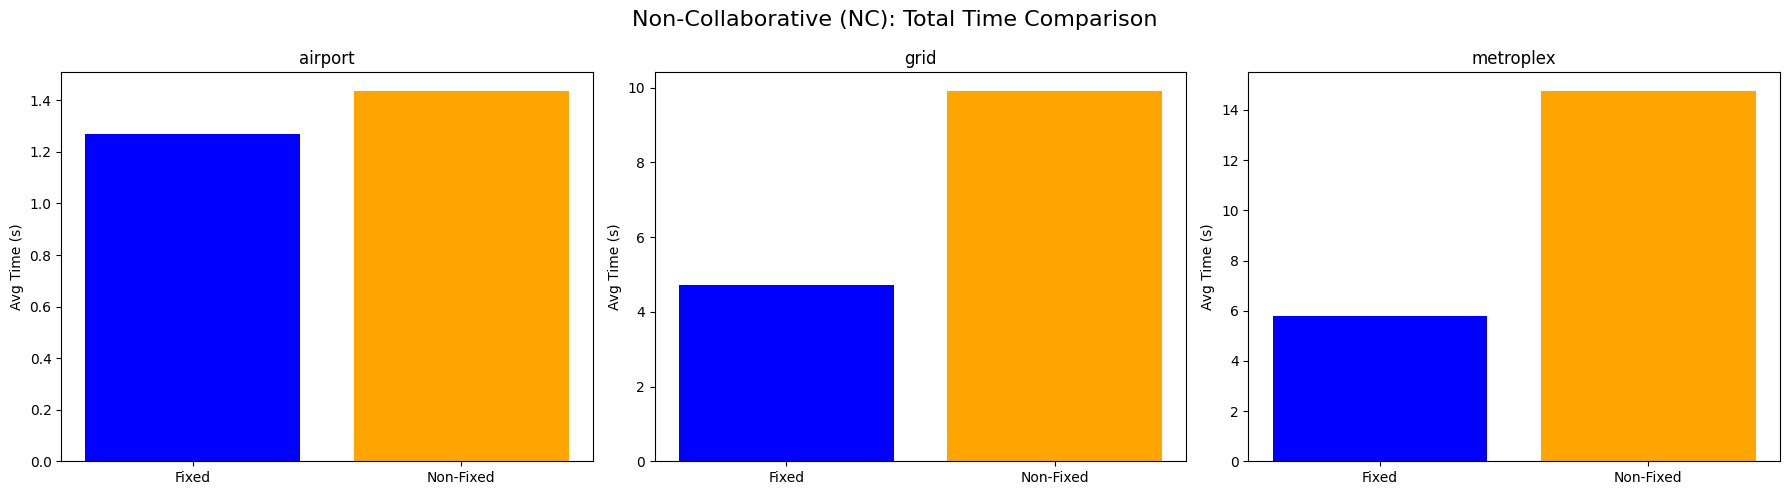

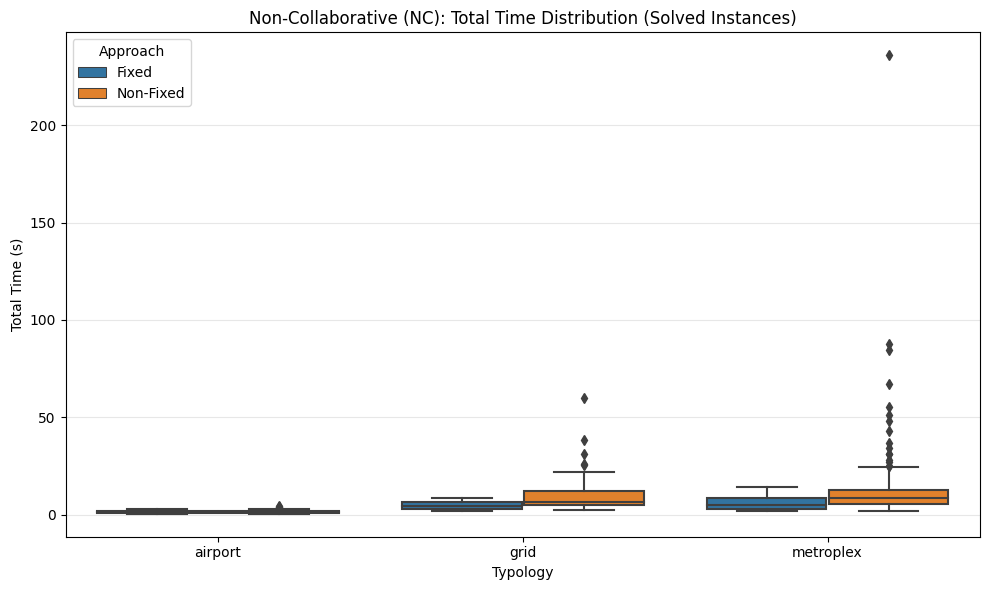


Detailed Differences (> 2e-6): 29 instances
        instance   Typology  result_Fixed  result_NonFixed  Improvement
195    airport83    airport      1.559791         1.531004     0.028787
231    airport83    airport      1.401896         1.373109     0.028787
256    airport83    airport      1.296689         1.267902     0.028787
3    metroplex10  metroplex     14.586466         7.300565     7.285901
21   metroplex10  metroplex     14.691729         7.405828     7.285901
40    metroplex1  metroplex      8.669896         8.180449     0.489447
49   metroplex10  metroplex     14.533835         7.247933     7.285902
50   metroplex33  metroplex      6.997494         3.115288     3.882206
75   metroplex31  metroplex     10.585366         2.011432     8.573934
101  metroplex57  metroplex      6.482515         3.823367     2.659148


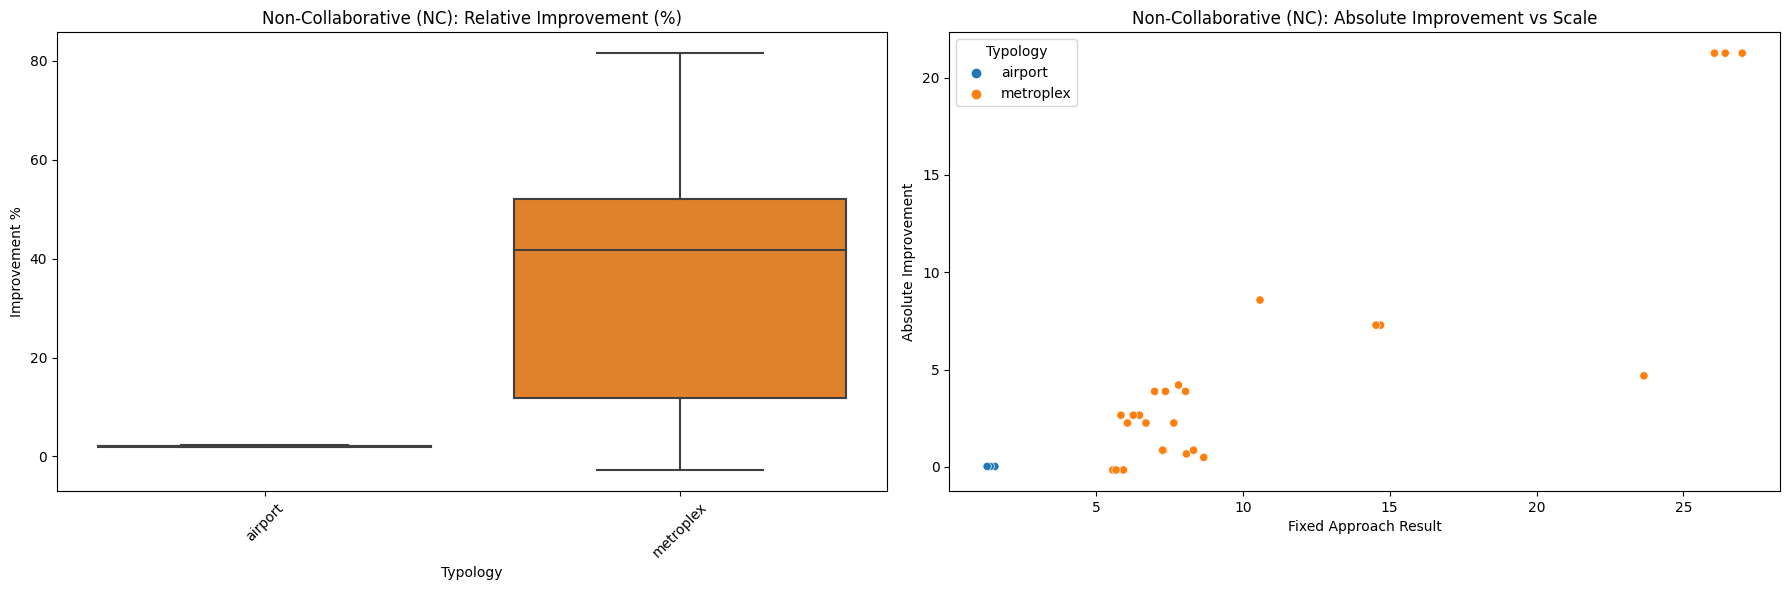

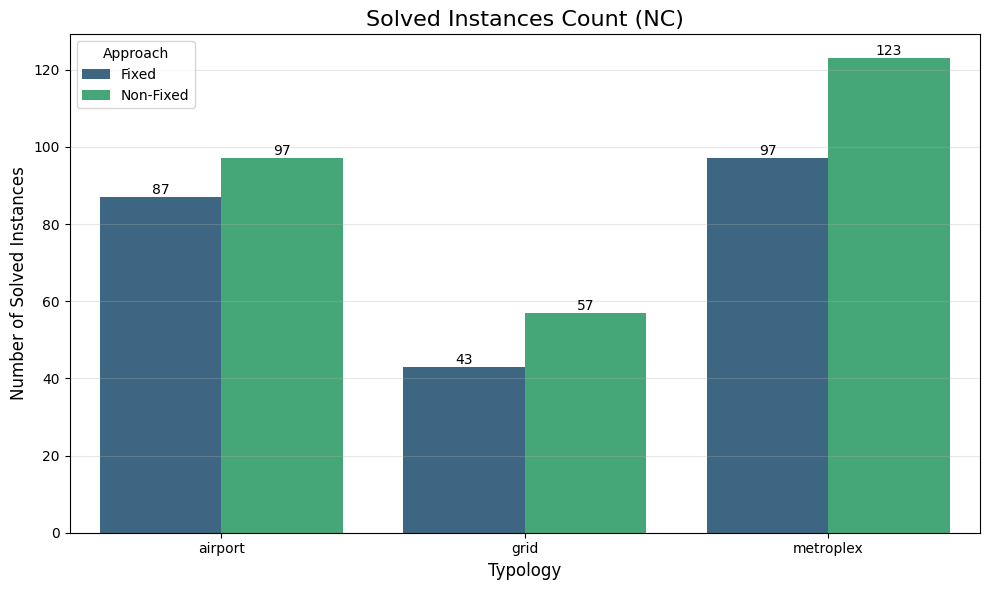

In [53]:
# Run for Non-Collaborative (NC)
typologies_NC = ['airport', 'grid', 'metroplex']
nc_results = run_comparison_analysis(dfsNCF, dfsNCNF, typologies_NC, "Non-Collaborative (NC)", NC=True, filter_tini=False)

# Generate Histogram for Solved Counts
if not nc_results.empty:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=nc_results, x='Typology', y='Solved_Count', hue='Approach', palette='viridis')
    
    plt.title('Solved Instances Count (NC)', fontsize=16)
    plt.ylabel('Number of Solved Instances', fontsize=12)
    plt.xlabel('Typology', fontsize=12)
    plt.legend(title='Approach')
    plt.grid(axis='y', alpha=0.3)
    
    # Add labels on top of bars
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.tight_layout()
    plt.show()